In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Data informations

In [2]:
df = pd.read_csv('./data/preprocessing/titanic-train.csv')

### a) Info about columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### b) Basic data view

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### c) Categorical Features

In [5]:
df = pd.read_csv('./data/preprocessing/weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Unique
Get unique value of column

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Encoding categorical data
Enum to vector

a) Pandas

In [8]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


b) sklearn

In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder_gender = LabelEncoder()
labelencoder_gender.fit_transform(df['Gender'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Feature Transformations

## Histogram

a) one chart

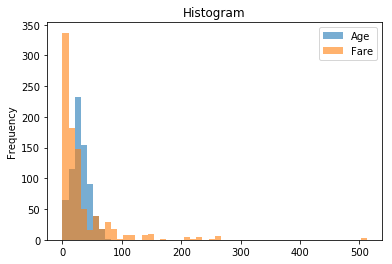

In [10]:
df = pd.read_csv('./data/preprocessing/titanic-train.csv')

df[["Age", "Fare"]].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)

b) multiple charts

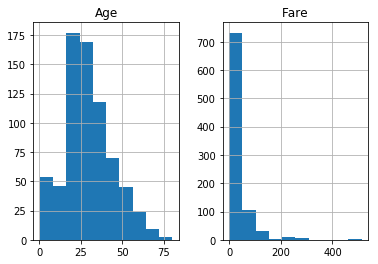

In [11]:
_ = df[["Age", "Fare"]].hist()

## Scaling

### Scaling - devide

In [12]:
df = pd.read_csv('./data/preprocessing/weight-height.csv')

#df['Weight (100 lbs)'] = df['Weight']/100.0
df['Height (feet)'] = df['Height']/12.0

df.describe().round(2)

,Height,Weight,Height (feet)
count,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53
std,3.85,32.11,0.32
min,54.26,64.70,4.52
25%,63.51,135.82,5.29
50%,66.32,161.21,5.53
75%,69.17,187.17,5.76
max,79.00,269.99,6.58


### Scaling - MinMax (default 0-1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
#df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Height_mms
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,0.49
std,3.85,32.11,0.32,0.16
min,54.26,64.70,4.52,0.00
25%,63.51,135.82,5.29,0.37
50%,66.32,161.21,5.53,0.49
75%,69.17,187.17,5.76,0.60
max,79.00,269.99,6.58,1.00


### Scaling - Standard (Std = 1)

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Height_mms,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,0.49,0.00
std,3.85,32.11,0.32,0.16,1.00
min,54.26,64.70,4.52,0.00,-3.15
25%,63.51,135.82,5.29,0.37,-0.74
50%,66.32,161.21,5.53,0.49,-0.01
75%,69.17,187.17,5.76,0.60,0.73
max,79.00,269.99,6.58,1.00,3.28


### Why we should scale?

Histograms are same - plot more charts.

a) subplot

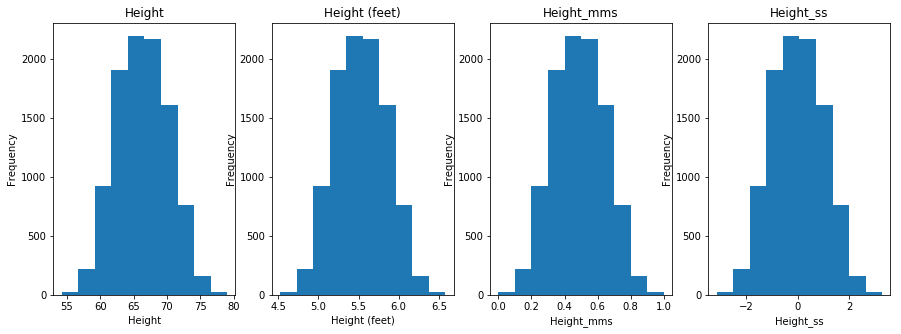

In [15]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

b) .hist

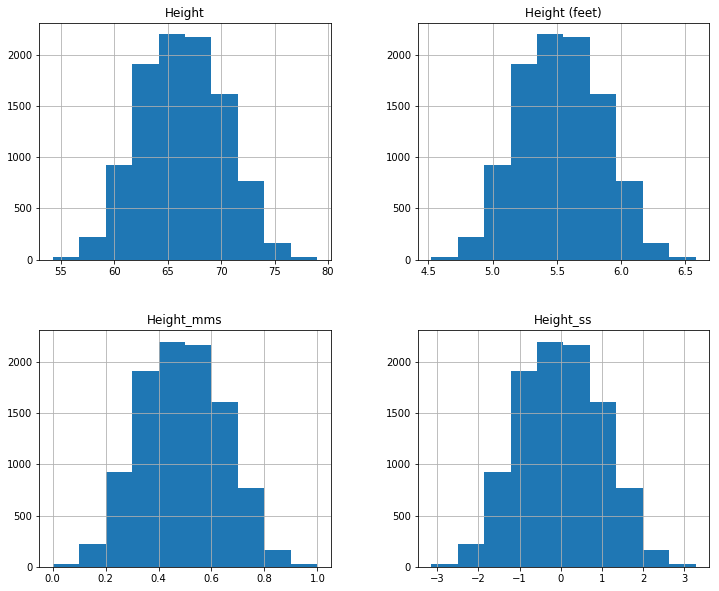

In [16]:
_ = df[['Height', 'Height (feet)', 'Height_mms', 'Height_ss']].hist(figsize=(12, 10))

# Seaborn

### Data preview

a) example 1

D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

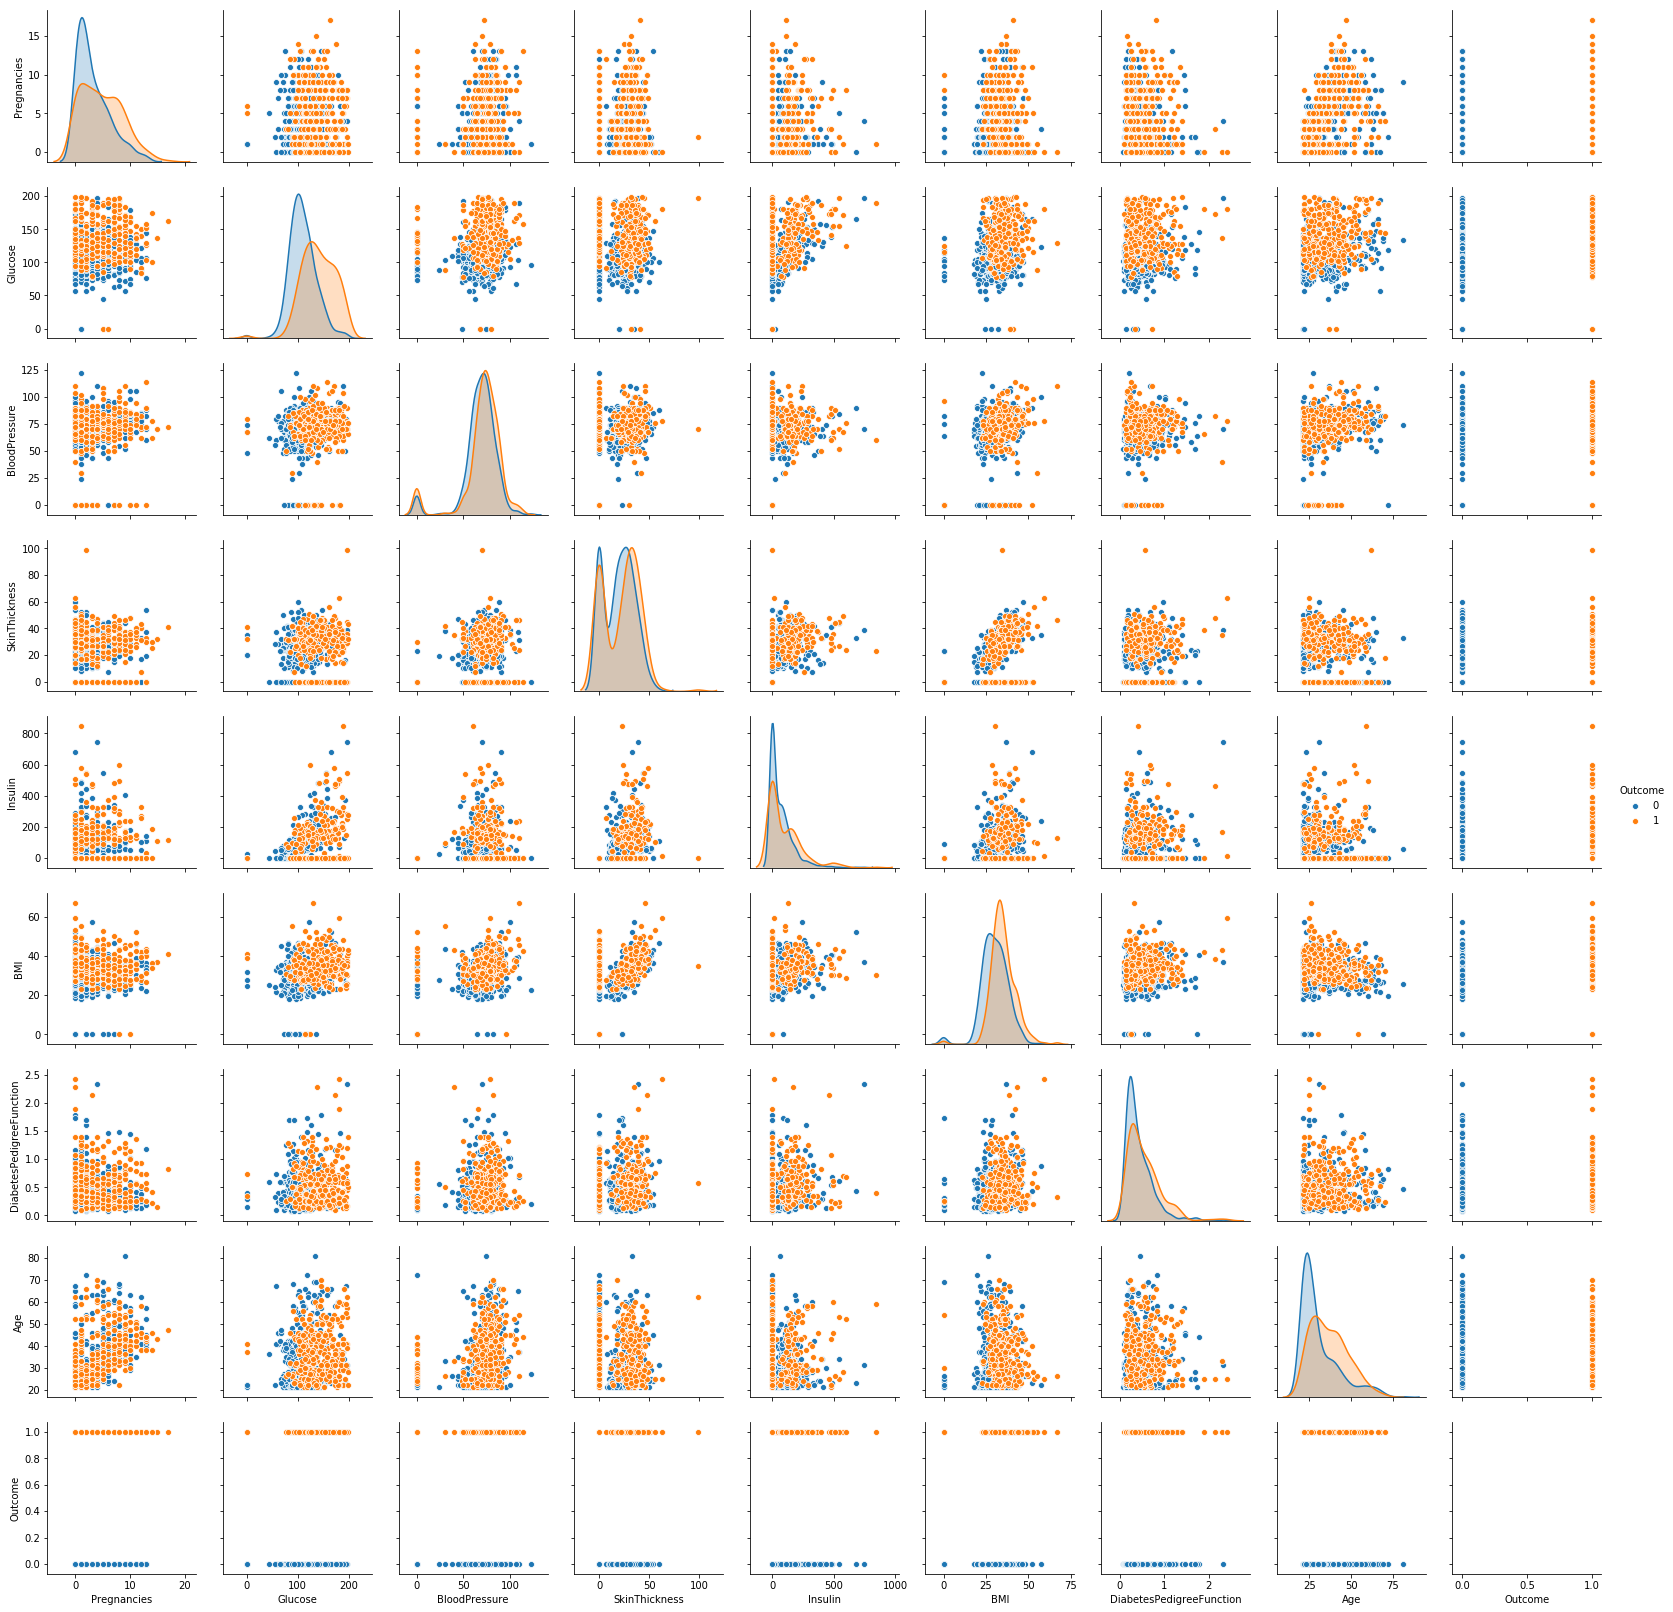

In [17]:
df = pd.read_csv('./data/preprocessing/diabetes.csv')

import seaborn as sns
sns.pairplot(df, hue='Outcome')

b) example 2 (Iris dataset)

D:\Programy\anaconda3\envs\GitHubDemo\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


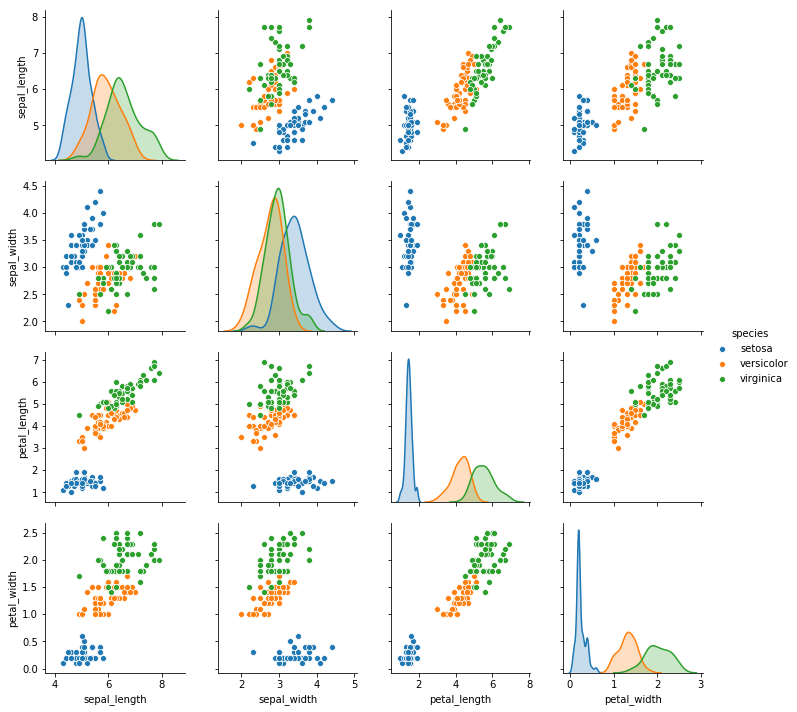

In [18]:
df = pd.read_csv('./data/preprocessing/iris.csv')
sns.pairplot(df, hue='species')

# Correlation - data I can remove from dataset

## Panda - numbers

In [19]:
df = pd.read_csv('./data/preprocessing/diabetes.csv')
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Panda - colours

In [20]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.13,0.14,-0.082,-0.074,0.018,-0.034,0.54,0.22
Glucose,0.13,1,0.15,0.057,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1,0.21,0.089,0.28,0.041,0.24,0.065
SkinThickness,-0.082,0.057,0.21,1,0.44,0.39,0.18,-0.11,0.075
Insulin,-0.074,0.33,0.089,0.44,1,0.2,0.19,-0.042,0.13
BMI,0.018,0.22,0.28,0.39,0.2,1,0.14,0.036,0.29
DiabetesPedigreeFunction,-0.034,0.14,0.041,0.18,0.19,0.14,1,0.034,0.17
Age,0.54,0.26,0.24,-0.11,-0.042,0.036,0.034,1,0.24
Outcome,0.22,0.47,0.065,0.075,0.13,0.29,0.17,0.24,1


### Seaborn

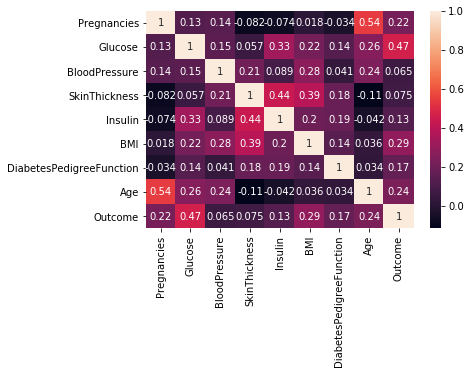

In [21]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

### Matplotlib

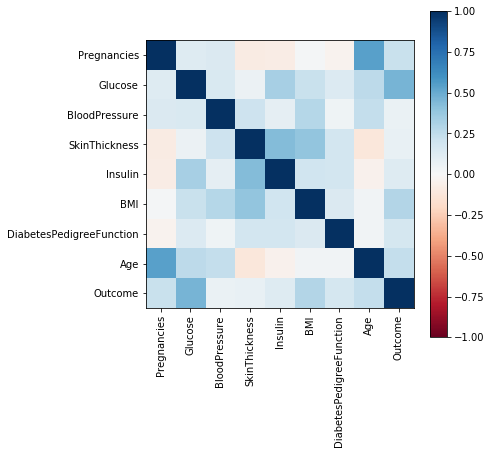

In [22]:
#Correlation
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.imshow(correlations, vmin=-1, vmax=1,cmap=plt.cm.RdBu)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns.values, rotation=90)
ax.set_yticklabels(df.columns.values)
plt.show()